In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.datasets import imdb

Using TensorFlow backend.


In [12]:
(X_train, y_train), (X_test, y_test)= imdb.load_data(num_words=10000)

In [13]:
text_len = [len(X_train[i]) for i in range(len(X_train))]
print(" Average length of review in training dataset", np.mean(text_len))

 Average length of review in training dataset 238.71364


 Std Deviation  of review in training dataset 176.49367364852034


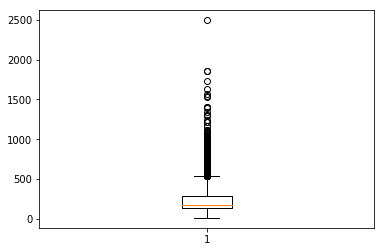

In [14]:
print(" Std Deviation  of review in training dataset", np.std(text_len))
plt.boxplot(text_len)
plt.show()

In [15]:
data_id= imdb.get_word_index()
#print(data_id)

In [16]:
#Print the third comment from the training dataset which is the indexes assigned to different words
print(X_train[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


Let’s see what are the words in the second review comment

In [17]:
word_and_index = {i : word for word, i in data_id.items()}
review_words = [word_and_index.get(i, ' ') for i in X_train[1]]
print(review_words)

['the', 'thought', 'solid', 'thought', 'senator', 'do', 'making', 'to', 'is', 'spot', 'nomination', 'assumed', 'while', 'he', 'of', 'jack', 'in', 'where', 'picked', 'as', 'getting', 'on', 'was', 'did', 'hands', 'fact', 'characters', 'to', 'always', 'life', 'thrillers', 'not', 'as', 'me', "can't", 'in', 'at', 'are', 'br', 'of', 'sure', 'your', 'way', 'of', 'little', 'it', 'strongly', 'random', 'to', 'view', 'of', 'love', 'it', 'so', 'principles', 'of', 'guy', 'it', 'used', 'producer', 'of', 'where', 'it', 'of', 'here', 'icon', 'film', 'of', 'outside', 'to', "don't", 'all', 'unique', 'some', 'like', 'of', 'direction', 'it', 'if', 'out', 'her', 'imagination', 'below', 'keep', 'of', 'queen', 'he', 'diverse', 'to', 'makes', 'this', 'stretch', 'and', 'of', 'solid', 'it', 'thought', 'begins', 'br', 'senator', 'and', 'budget', 'worthwhile', 'though', 'ok', 'and', 'awaiting', 'for', 'ever', 'better', 'were', 'and', 'diverse', 'for', 'budget', 'look', 'kicked', 'any', 'to', 'of', 'making', 'it',

## Build model

In [18]:
# Use 10000 most frequent words from the reviews
number_of_most_frequent_words=10000

# Max length of review 500
max_len = 500

Review comments have different length, let's pad all the sequences to the same length. Most of review do not have a length above 500 words.

Do this for both training data and testing data.

In [21]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train,maxlen=max_len,padding='post' )
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout

### Building the model using embedding and LSTM.

#### Add the embedding layer with following parameters. 
Embedding layer converts integer indices to dense vectors of length 128.

#### Add LSTM layer
LSTM can learn the relationships between elements in an input sequence. Also overcomes the problem of vanishing gradient problem in RNN.

#### Add output layer
Output is positive or negative sentiment, so use sigmoid activation fuction.

In [28]:
#input_dim: Size of the vocabulary, which is the number of most frequent words.

#output_dim: Dimension of the dense embedding. It is the vector space in which words will be embedded

#input_length: Length of input sequences which is max_len

model = Sequential()
model.add(Embedding(input_dim=number_of_most_frequent_words, 
                    output_dim=128, 
                    input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

W0107 11:35:01.114362 4547114432 deprecation.py:506] From /Users/zhoujieying/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
unified_lstm (UnifiedLSTM)   (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [36]:
result = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 1151s 46ms/sample - loss: 0.6393 - acc: 0.5383 - val_loss: 0.7279 - val_acc: 0.5081
Epoch 2/5
25000/25000 [==============================] - 1299s 52ms/sample - loss: 0.6366 - acc: 0.5461 - val_loss: 0.7256 - val_acc: 0.5164
Epoch 3/5
25000/25000 [==============================] - 1249s 50ms/sample - loss: 0.6406 - acc: 0.5495 - val_loss: 0.7371 - val_acc: 0.5195
Epoch 4/5
25000/25000 [==============================] - 1448s 58ms/sample - loss: 0.6364 - acc: 0.5465 - val_loss: 0.7416 - val_acc: 0.5102
Epoch 5/5
25000/25000 [==============================] - 1492s 60ms/sample - loss: 0.5963 - acc: 0.6080 - val_loss: 0.4993 - val_acc: 0.7924


In [37]:
score, acc = model.evaluate(X_test, y_test, batch_size=32)

25000/25000 [==============================] - 113s 5ms/sample - loss: 0.4993 - acc: 0.7924


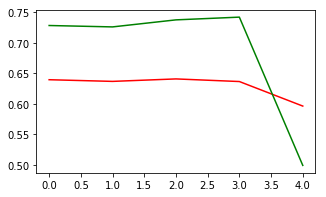

In [38]:
plt.figure(figsize=(5,3))
plt.plot(result.epoch,result.history['loss'], label='training', color='red')
plt.plot(result.epoch,result.history['val_loss'], label='validation', color='green')

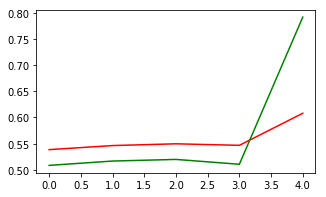

In [39]:
plt.figure(figsize=(5,3))
plt.plot(result.epoch,result.history['acc'], label='training', color='red')
plt.plot(result.epoch,result.history['val_acc'], label='validation', color='green')